In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.824561,0.225581,0.595041,0.278481,0.890625,0.627586,0.757660,0.283019,0.737255,0.471861,0.549451,0.970696,0.561341
1,1,0.523392,0.241860,0.355372,0.000000,0.468750,0.575862,0.674095,0.245283,0.341176,0.335498,0.560440,0.780220,0.550642
2,1,0.511696,0.376744,0.793388,0.468354,0.484375,0.627586,0.807799,0.320755,0.941176,0.476190,0.538462,0.695971,0.646933
3,1,0.865497,0.281395,0.652893,0.354430,0.671875,0.989655,0.877437,0.207547,0.694118,0.705628,0.351648,0.798535,0.857347
4,1,0.535088,0.430233,0.958678,0.620253,0.750000,0.627586,0.654596,0.490566,0.552941,0.329004,0.549451,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3,0.397661,0.383721,0.471074,0.525316,0.250000,0.141379,0.047354,0.660377,0.090196,0.396336,0.032967,0.131868,0.136947
172,3,0.804094,0.411628,0.636364,0.556962,0.328125,0.241379,0.100279,0.584906,0.325490,0.911255,0.087912,0.161172,0.272468
174,3,0.581871,0.737209,0.636364,0.746835,0.500000,0.282759,0.114206,0.566038,0.392157,0.651515,0.175824,0.106227,0.336662
175,3,0.543860,0.823256,0.454545,0.556962,0.781250,0.210345,0.097493,0.566038,0.368627,0.965368,0.054945,0.106227,0.397290


In [ ]:
column_names = ['Target','Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [ ]:
df = pd.read_csv("wine.csv",header=None,names=column_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target                        178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    176 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    float64
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
df

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,3,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,3,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,3,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
for column in df.columns:
    if column == "ID":
        continue
    if column == "Target":
        continue
    df[column] = df[column].fillna(df[column].mean())

In [ ]:
# Show columns
columns = df.columns
columns = list(columns[1:15])
columns

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [ ]:
# Check for outlier data

for column in columns:

    #2 Aykırı değerleri belirleme ve temizleme
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR
    #result = all((df[column] >= alt_sinir) & (df[column] <= ust_sinir))
    #df = df[(df["Çalışma Saati"] >= alt_sinir) & (df["Çalışma Saati"] <= ust_sinir)]
    df = df[(df[column] >= alt_sinir) & (df[column] <= ust_sinir)]
    #df = df[(df[column] >= alt_sinir) & (df[column] <= ust_sinir)]


In [ ]:
# Check value again
(df[column] >= alt_sinir) & (df[column] <= ust_sinir)

0      True
1      True
2      True
3      True
4      True
       ... 
171    True
172    True
174    True
175    True
176    True
Name: Proline, Length: 156, dtype: bool

In [ ]:
# Normalizasyon
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

In [ ]:
df

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.824561,0.225581,0.595041,0.278481,0.890625,0.627586,0.757660,0.283019,0.737255,0.471861,0.549451,0.970696,0.561341
1,1,0.523392,0.241860,0.355372,0.000000,0.468750,0.575862,0.674095,0.245283,0.341176,0.335498,0.560440,0.780220,0.550642
2,1,0.511696,0.376744,0.793388,0.468354,0.484375,0.627586,0.807799,0.320755,0.941176,0.476190,0.538462,0.695971,0.646933
3,1,0.865497,0.281395,0.652893,0.354430,0.671875,0.989655,0.877437,0.207547,0.694118,0.705628,0.351648,0.798535,0.857347
4,1,0.535088,0.430233,0.958678,0.620253,0.750000,0.627586,0.654596,0.490566,0.552941,0.329004,0.549451,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3,0.397661,0.383721,0.471074,0.525316,0.250000,0.141379,0.047354,0.660377,0.090196,0.396336,0.032967,0.131868,0.136947
172,3,0.804094,0.411628,0.636364,0.556962,0.328125,0.241379,0.100279,0.584906,0.325490,0.911255,0.087912,0.161172,0.272468
174,3,0.581871,0.737209,0.636364,0.746835,0.500000,0.282759,0.114206,0.566038,0.392157,0.651515,0.175824,0.106227,0.336662
175,3,0.543860,0.823256,0.454545,0.556962,0.781250,0.210345,0.097493,0.566038,0.368627,0.965368,0.054945,0.106227,0.397290


In [ ]:
x = df[columns]
y = df["Target"]

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
171    3
172    3
174    3
175    3
176    3
Name: Target, Length: 156, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=35)

In [ ]:
models={"Logistic Regression":LogisticRegression(),
       "K-NN":KNeighborsClassifier(),
       "SVM":SVC()}

In [ ]:
accuracy_values={}

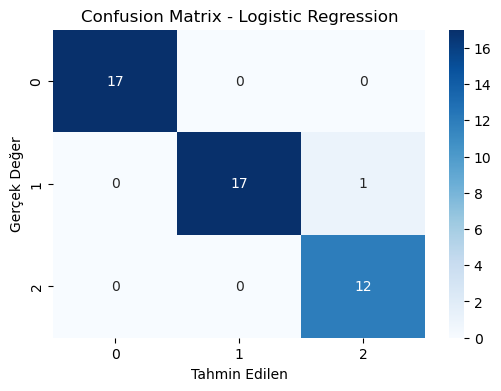

Model: Logistic Regression
Accuracy: 0.9787234042553191

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        12

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

--------------------------------------------------


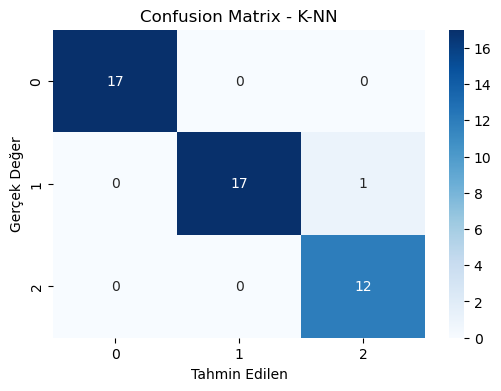

Model: K-NN
Accuracy: 0.9787234042553191

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        12

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

--------------------------------------------------


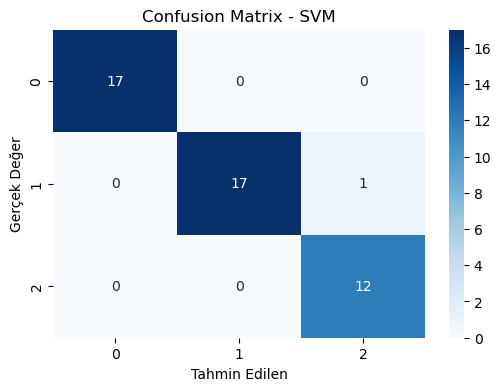

Model: SVM
Accuracy: 0.9787234042553191

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        12

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47

--------------------------------------------------


In [ ]:
for model_name, model in models.items():
    #modelimizi eğitelim
    model.fit(x_train, y_train)
    #test verisi ile tahmin yapalım
    y_prediction=model.predict(x_test)
    #doğruluk oranını hesaplayalım
    accuracy=accuracy_score(y_test,y_prediction)
    #accuracy değerini accuracy sözlüğümüze kaydedelim
    accuracy_values[model_name]=accuracy
    cm = confusion_matrix(y_test, y_prediction)

    # Confusion Matrix'i görselleştir
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek Değer")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Classification Report yazdır
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_prediction))
    print("-" * 50)

In [1]:
accuracy_values

NameError: name 'accuracy_values' is not defined

In [ ]:
#conf matrix

cm = confusion_matrix(y_test, y_prediction)

In [ ]:
cm

array([[17,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 12]])

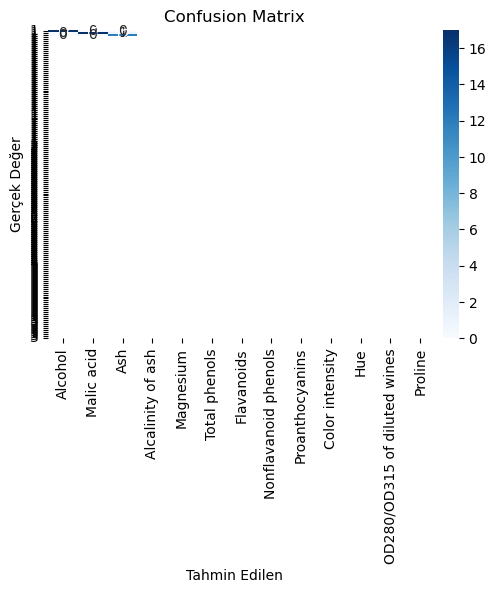

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=columns, yticklabels=df["Target"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Confusion Matrix")
plt.show()
